### Deliverable 1: Preprocessing the Data for a Neural Network

## Import dependencies

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

import pandas as pd 

In [2]:
#  Import additional dependencies
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


## Import the input dataset

In [3]:
# Import and read the charity_data.csv
application_df = pd.read_csv("./Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# look at the data types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
# check the shape
application_df.shape

(34299, 12)

## General Data Cleaning and Futrue Selection

In [6]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df = application_df.drop(["EIN"], 1)
application_df.info()                                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


C:\Users\Yanke\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [7]:
# check the shape
application_df.shape

(34299, 11)

## Determine the number of unique values in each column

In [8]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

## Examine other low information columns of STATUS and SPECIAL CONSIDERATIONS

In [ ]:
# examine value counts for STATUS
#application_df["STATUS"].value_counts()


In [ ]:
# examine value counts for SPECIAL_CONSIDERATIONS
#application_df["SPECIAL_CONSIDERATIONS"].value_counts()

In [9]:
# Drop the non-beneficial ID columns, STATUS and SPECIAL_CONSIDERATIONS
# application_df = application_df.drop(["STATUS", "SPECIAL_CONSIDERATIONS"], 1)
# application_df.info()                 

In [10]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

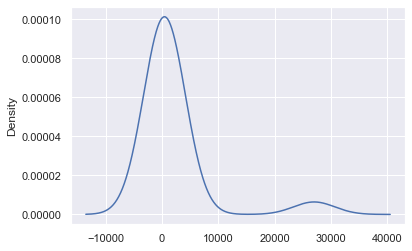

In [11]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [13]:
# list(application_counts[application_counts < 500].index)

In [ ]:
# replace_application = list(application_counts[application_counts < 500].index)

In [14]:
# Determine which values to replace if counts are less than ...? (less than 100)
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df["APPLICATION_TYPE"] = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df["APPLICATION_TYPE"].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

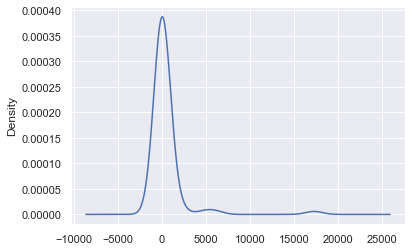

In [16]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [17]:
class_counts < 1000

C1000    False
C2000    False
C1200    False
C3000    False
C2100    False
         ...  
C4120     True
C8210     True
C2561     True
C4500     True
C2150     True
Name: CLASSIFICATION, Length: 71, dtype: bool

In [18]:
# list(class_counts[class_counts < 1000].index)

In [19]:
# Determine which values to replace if counts are less than ..? (Less than 1000)
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [20]:
application_df.nunique()

NAME                      19568
APPLICATION_TYPE              9
AFFILIATION                   6
CLASSIFICATION                6
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [21]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [22]:
# application_df.dtypes

In [23]:
# [application_df.dtypes == "object"]

In [24]:
# application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [25]:
# Generate our categorical variable lists
# application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
# application_cat

In [26]:
# testing
# application_df[application_cat]

## Bin Names

In [27]:
## Look at NAME value counts for binning
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

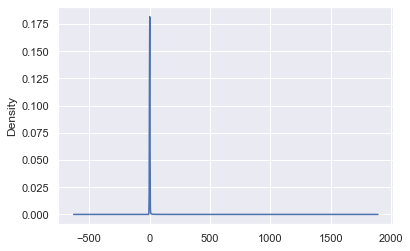

In [28]:
# Visualize the value counts 
name_counts.plot.density()

In [29]:
# how many name_counts are only with 1?
name_counts[name_counts <= 1]

ARTS SCIENCE AND TECHNOLOGY EDUCATIONAL CORPORATION OF TEHACHA          1
UPTE-CWA RETIRED MEMBERS CHAPTER 9119                                   1
WORLD PRESIDENTS ORGANIZATION INC                                       1
HOMELESS ANIMAL RESCUE TEAM                                             1
DREAM WEAVER CHARITABLE TR                                              1
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 18776, dtype: int64

In [30]:
# how many name_counts are less than 5?
name_counts[name_counts <= 5]

FLORIDA FAMILY CHILD CARE HOME ASSOCIATION INC                          5
GERONTOLOGICAL ADVANCED PRACTICE NURSES ASSOCIATION                     5
INTERNATIONL TRANSPLANT NURSES SOCIETY                                  5
NATIONAL ORGANIZATION FOR WOMEN INC                                     5
PTA HAWAII CONGRESS                                                     5
                                                                       ..
ST LOUIS SLAM WOMENS FOOTBALL                                           1
AIESEC ALUMNI IBEROAMERICA CORP                                         1
WEALLBLEEDRED ORG INC                                                   1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI    1
WATERHOUSE CHARITABLE TR                                                1
Name: NAME, Length: 19214, dtype: int64

In [31]:
# how many name_counts are less than 100 and greater than 100?
name_counts[((name_counts <= 100) & (name_counts > 5))]

AIR FORCE ASSOCIATION                                      99
WORKERS UNITED                                             97
GAMMA THETA UPSILON                                        92
INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS                 91
SOCIETY OF SAINT VINCENT DE PAUL COUNCIL OF LOS ANGELES    87
                                                           ..
OLD OAK CLIFF CONSERVATION LEAGUE INC                       6
AMERICAN NEPHROLOGY NURSES ASSOCIATION                      6
HUMBLE ISD EDUCATIONAL SUPPORT GROUPS INC                   6
PROFESSIONAL LOADMASTER ASSOCIATION                         6
CBMC INC                                                    6
Name: NAME, Length: 324, dtype: int64

In [32]:
# how many name_counts are greater than 100?
len(name_counts[name_counts > 100])

30

In [44]:
# Use Bucket technique to put > 5, but < 100 in a bucket
# put those wth <=5 in a small bucket
# determine values to replace if counts are <= 5
replace_application = list(name_counts[name_counts <= 1].index)

# Replace in dataframe
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app, "No_repeat")
    
# Check bining was successful
application_df["NAME"].value_counts()

No_reapeat    18776
Habitual       8312
Frequent       5944
Infrequent     1267
Name: NAME, dtype: int64

In [45]:
# put those wth <=5 in a small bucket
# determine values to replace if counts are <= 5
replace_application = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app, "Infrequent")
    
# Check bining was successful
application_df["NAME"].value_counts()

No_reapeat    18776
Habitual       8312
Frequent       5944
Infrequent     1267
Name: NAME, dtype: int64

In [46]:
# put those wth >5 and < 100 in a bucket
replace_application = list(name_counts[name_counts <= 100].index)

# Replace in dataframe
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app, "Frequent")
    
# Check bining was successful
application_df["NAME"].value_counts()

No_reapeat    18776
Habitual       8312
Frequent       5944
Infrequent     1267
Name: NAME, dtype: int64

In [47]:
# put those wth > 100 in a bucket
replace_application = list(name_counts[name_counts > 100].index)

# Replace in dataframe
for app in replace_application:
    application_df["NAME"] = application_df["NAME"].replace(app, "Habitual")
    
# Check bining was successful
application_df["NAME"].value_counts()

No_reapeat    18776
Habitual       8312
Frequent       5944
Infrequent     1267
Name: NAME, dtype: int64

## Generate catergorical variable list

In [52]:
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [55]:
# test
application_df.dtypes[application_df.dtypes == "object"].index.tolist()

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [56]:
# Generate our list
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [57]:
application_df[application_cat]

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,Frequent,T10,Independent,C1000,ProductDev,Association,0,N
1,No_reapeat,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,No_reapeat,T5,CompanySponsored,C3000,ProductDev,Association,0,N
3,No_reapeat,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,No_reapeat,T3,Independent,C1000,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...,...
34294,No_reapeat,T4,Independent,C1000,ProductDev,Association,0,N
34295,Habitual,T4,CompanySponsored,C3000,ProductDev,Association,0,N
34296,Infrequent,T3,CompanySponsored,C2000,Preservation,Association,0,N
34297,No_reapeat,T5,Independent,C3000,ProductDev,Association,0,N


## Create a OneHotEncoder instance

In [59]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


In [60]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Yanke\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_Frequent,NAME_Habitual,NAME_Infrequent,NAME_No_reapeat,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Yanke\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_Frequent,NAME_Habitual,NAME_Infrequent,NAME_No_reapeat,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
application_df.shape

(34299, 48)

In [63]:
#check if everything is numeric
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  int64  
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   NAME_Frequent                 34299 non-null  float64
 4   NAME_Habitual                 34299 non-null  float64
 5   NAME_Infrequent               34299 non-null  float64
 6   NAME_No_reapeat               34299 non-null  float64
 7   APPLICATION_TYPE_Other        34299 non-null  float64
 8   APPLICATION_TYPE_T10          34299 non-null  float64
 9   APPLICATION_TYPE_T19          34299 non-null  float64
 10  APPLICATION_TYPE_T3           34299 non-null  float64
 11  APPLICATION_TYPE_T4           34299 non-null  float64
 12  APPLICATION_TYPE_T5           34299 non-null  float64
 13  A

## Split the preprocessed data into our features and target arrays

## Split the preprocessed data into a training and testing dataset

In [64]:
# Split our preprocessed data into our features and target arrays
#  X = is our feature matrix
X = application_df.drop(["IS_SUCCESSFUL"], 1).values
X

y = application_df["IS_SUCCESSFUL"].values
y

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\Yanke\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


## Create a StandardScaler instances

## Fit the StandardScaler

## Scale the data

In [65]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Deliverable 1: Save AlphabetSoupCharity.ipynb 

### Deliverable 3: Optimization: Compile, train, and evalute the model

## Define the model

## Add first and second hidden layers

## Add the output layer

## Check the structure of the model

## Use the Tensorflow Playground to build and visualize the same model

In [66]:
#testing
len(X_train[0])

47

## Compile the Model

In [67]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features * 3
hidden_nodes_layer2 = number_input_features * 2
hidden_nodes_layer3 = number_input_features * 1
hidden_nodes_layer4 = 20

nn = tf.keras.models.Sequential()

# Rule of thumb: From 19.2.5: A basic neural network should have two to three times the amount of neurons 
# in the hidden layer as the the number of inputs

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 141)               6768      
                                                                 
 dense_1 (Dense)             (None, 94)                13348     
                                                                 
 dense_2 (Dense)             (None, 47)                4465      
                                                                 
 dense_3 (Dense)             (None, 20)                960       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 25,562
Trainable params: 25,562
Non-trainable params: 0
_________________________________________________________________


## Implement Checkpoints

In [70]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

## Compile the Model

In [71]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [72]:
# Create a callback that saves the model's weights every 5th epoch


cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

## Train the Model

In [73]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=20, callbacks=[cp_callback])

Epoch 1/20
  1/804 [..............................] - ETA: 12:16 - loss: 0.7028 - accuracy: 0.4688
Epoch 1: saving model to checkpoints\weights.01.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6967 - accuracy: 0.5000   
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 5s - loss: 0.6960 - accuracy: 0.4917
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 25/804 [..............................] - ETA: 5s - loss: 0.6911 - accuracy: 0.5288
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 35/804 [>.............................] - ETA: 5s - loss: 0.6895 - accuracy: 0.5384
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 45/804 [>.............................] - ETA: 5s - loss: 0.6863 - accuracy:

## Evaluate the model for loss and accuracy using the tes data

In [74]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

<AxesSubplot:>

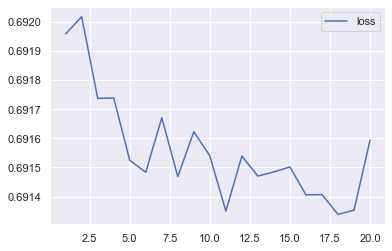

In [75]:
# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

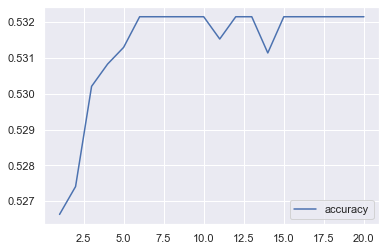

In [76]:
# PLot the accuracy
history_df.plot(y="accuracy")

In [77]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6910 - accuracy: 0.5332 - 703ms/epoch - 3ms/step
Loss: 0.6910378336906433, Accuracy: 0.5331778526306152


## Save the model in HDF5 format

In [78]:
# Export our model to HDF5 file
nn.save("./Trained_Models/AlphabetSoupCharity_OptimizationD2.h5")